Algoritmos Genéticos y Optimización Heurística - UTN-FRT
# **Trabajo Práctico N°4** 
##**Tema**: Algoritmo Genético Simple##

## Ejercicio 1
Complete los fragmentos faltantes del código de los operadores genéticos que se muestran a continuación (reutilice el código del Trabajo Práctico anterior). Pruebe el Algoritmo Genético con la función F(x, y) = floor(x) + floor(y), x,y ∈ [-5.12, 5.12].

In [ ]:
import random, math

def geneticoSimple(Pop, cant_generac, Bounds, Enteras, sel, xover, mut, \
                   cant_cruzados, cant_mutados, cant_elite, param_sel, f, callback=None):
    """
    Algoritmo Genetico Simple
    Parametros:
    - Pop: list. poblacion inicial (lista de listas).
    - cant_generac: int. Cantidad de iteraciones del algoritmo.
    - Bounds: list: Matriz que indica los valores max y min de cada variable.
    - Enteras: list. Vector booleano que indica si las coordenadas son enteras.
    - cant_cruzados: int. Cantidad de individuos que seran cruzados.
    - cant_mutados: int. Cantidad de soluciones a las cuales se le aplicara
      mutacion.
    - cant_elite: int. Numero de mejores soluciones que pasan a la siguiente 
      generacion sin cambio alguno.
    - param_sel: float. Parametro usado en la seleccion, por ejemplo el peso que 
      se le asigna a la solucion menos probable en el calculo de la probabilidad 
      para ruleta. En caso de usar torneo, este es el tamano del torneo.
    - f: function. Funcion de evaluacion. Debe recibir como parametro un vector
      solucion y devolver un numero real.
    - callback: function. Funcion que se ejecuta una vez en cada iteracion (para  
      mostrar resultados parciales). Usar None para deshabilitarla.
    Salida
    - soluc: list. Vector solucion que obtuvo fitness mas alto.
    - solF: float. Valor de evaluacion de la mejor solucion.
    - Pop: list. Poblacion final.
    - Fit: list. Fitness de cada individuo de la poblacion final.
    - traceBest: list. Vector con los mejores valores de fitness obtenidos en
      cada generacion. Se puede utilizar para determinar si el algoritmo 
      llego a crowding.
    - traceAvg: list. Vector con los valores promedio de fitness
      obtenidos en cada generacion.
    """
    #inicializacion
    sol = []
    solF = None
    cant_soluc = len(Pop)
    Fit = [None] * cant_soluc
    traceBest = []
    traceAvg = []
    bestSols = []
    
    #verifico los parametros de entrada
    if cant_soluc < 2:
        print('La Poblacion debe tener al menos dos individuos.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    cant_variables = len(Pop[0])   
    if len(Bounds) != cant_variables or len(Bounds[0]) != 2:
        print('El tamano de la matriz Bounds es incorrecto.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    if len(Enteras) != cant_variables:
        print('El tamano del vector Enteras es incorrecto.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    if cant_cruzados > cant_soluc:
        print('La cantidad de cruzados debe ser menor que el tamano de la poblacion.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    if cant_mutados > cant_soluc:
        print('La cantidad de mutados debe ser menor que el tamano de la poblacion.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols
    if cant_elite >= cant_soluc:
        print('El tamano de la elite debe ser menor que el tamano de la poblacion.')
        return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols

    #inicializo variables para reducir tiempo de calculo
    cb_param = None
    p = [i for i in range(cant_soluc)]
    
    #realizo las evaluaciones de la poblacion inicial.
    for k in range(cant_soluc):
        Pop[k] = [xi if not Enteras[i] else int(xi+0.5) for i, xi in enumerate(Pop[k])]
        Fit[k] = f(Pop[k])
    if callback != None:
        cb_param = callback(Pop, Fit, Bounds, 0, cant_generac, cb_param)
    #obtengo el orden de los individuos
    p_orden = sorted(range(len(Fit)), key=lambda k: Fit[k], reverse=True)
        
    for gen in range(cant_generac):
        #selecciono la elite de la generacion actual (una copia)
        Elite = [[xi for xi in Pop[p_orden[k]]] for k in range(cant_elite)]
        Elite_Fit = [Fit[p_orden[k]] for k in range(cant_elite)]

        #seleccion
        p_sel = sel(Fit, cant_soluc, param_sel)
        random.shuffle(p)
        Pop = [Pop[p_sel[k]] for k in p]
        Fit = [Fit[p_sel[k]] for k in p]

        #cruzamiento
        random.shuffle(p)
        for k in range(0, cant_cruzados-1, 2):
            C1, C2 = xover(Pop[p[k]], Pop[p[k+1]])
            Pop[p[k]] = [xi for xi in C1]
            Pop[p[k+1]] = [xi for xi in C2]
            Fit[p[k]] = None
            Fit[p[k+1]] = None

        #mutacion
        random.shuffle(p)
        for k in range(cant_mutados):
            C = mut(Pop[p[k]], Bounds)
            Pop[p[k]] = [xi for xi in C]
            Fit[p[k]] = None

        #inserto la elite en la nueva poblacion en lugares al azar
        random.shuffle(p)
        for k in range(cant_elite):
            Pop[p[k]] = Elite[k]
            Fit[p[k]] = Elite_Fit[k]

        #realizo las evaluaciones de la nueva generacion
        for k in range(cant_soluc):
            if Fit[k] == None:
                Pop[k] = [xi if not Enteras[i] else int(xi+0.5) for i, xi in enumerate(Pop[k])]
                Fit[k] = f(Pop[k]);
        
        #obtengo el orden de los individuos
        p_orden = sorted(range(len(Fit)), key=lambda k: Fit[k], reverse=True)

        #datos estadisticos
        traceBest.append(Fit[p_orden[0]])
        traceAvg.append(sum(Fit) / len(Fit))
        bestSols.append([xi for xi in Pop[p_orden[0]]])

        #funcion para graficar, mostrar, etc.
        if callback != None:
            cb_param = callback(Pop, Fit, Bounds, gen, cant_generac, cb_param)
        
    #busco la mejor solucion obtenida
    solF = Fit[p_orden[0]]
    sol = Pop[p_orden[0]]
    
    return sol, solF, Pop, Fit, traceBest, traceAvg, bestSols

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from time import sleep

def graficarEvolucionFitness(best, mean):
    """Método para graficar la evolucion del fitness con las iteraciones.
    Parametros
    best, mean : list. Lista con los valores de evaluación de la mejor y peor solución.
    """
    fig = plt.figure()
    ax = plt.axes()
    x = range(len(best));
    plt.plot(x, best, label='Mejor solución');
    plt.plot(x, mean, label='Promedio poblacion');
    plt.title('Valores de Evaluación')
    plt.xlabel('Iteración')
    plt.ylabel('Fitness')
    plt.grid()
    plt.legend()

def graficarCaminata(fitness, solutions,  bounds, resolution, alpha=0.5):
    """Graficar la funcion de evaluacion y las soluciones encontradas.
    Parametros
    fitness : function. Función de evaluación a optimizar
    solutions : list. Lista de soluciones encontradas.
    bounds: list(tuple). Matriz de tamano nx2, donde n es la cantidad de 
    variables del problema (cantidad de coordenadas del vector solución). 
    resolution : float. Resolución para graficar la función (mayor a 0.1).
    alpha : float. Transparencia para el grafico de la función.
    """
    ranges = []
    for i in range(len(bounds)):
        steps = round((bounds[i][1] - bounds[i][0]) / resolution)
        ranges.append([bounds[i][0] + s*resolution for s in range(steps)])
    if len(bounds) == 1:
        fig = plt.figure()
        ax = fig.gca()
        X = [xi for xi in ranges[0]]
        Y = [fitness(xi) for xi in ranges[0]]
        plt.plot(X, Y, antialiased=False, alpha=alpha)
        plt.title('Función de Evaluación')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid()
        x = [s[0] for s in solutions]
        y = [fitness(s) for s in solutions]
        ax.scatter(x, y, c='k', marker='o')
    elif len(bounds) == 2:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        X = []; Y = []; Z = []
        for i, xi in enumerate(ranges[0]):
            X.append([xi for yj in ranges[1]])
            Y.append([yj for yj in ranges[1]])
            Z.append([fitness([xi, yj]) for yj in ranges[1]])
        surf = ax.plot_surface(X, Y, np.array(Z), cmap=cm.coolwarm, linewidth=0, 
            antialiased=False, alpha=alpha)
        plt.title('Función de Evaluación')
        plt.xlabel('x')
        plt.ylabel('y')
        ax.set_zlabel('f(x,y)')
        fig.colorbar(surf, shrink=0.5, aspect=5)
        x = [s[0] for s in solutions]
        y = [s[1] for s in solutions]
        z = [fitness(s) for s in solutions]
        ax.scatter(x, y, z, c='k', marker='o')
    else: 
        return False
    return True

def callback_print(Pop, Fit, Bounds, gen, cant_generac, params):
    """Mostrar el valor de fitness si se encuentra una mejor solucion en la 
    generacion actual"""
    v = max(Fit)
    if gen == 0:
        params = v
    if v >= params:
        p = Fit.index(v)
        print("Gen.{0}: {1} ({2})".format(gen, Pop[p], v))
    return params

def callback_graficar(Pop, Fit, Bounds, gen, cant_generac, params):
    v = max(Fit)
    if gen == 0 and len(Bounds) == 2:
        params = v
        plt.figure()
    if v >= params and len(Bounds) == 2:
        fig = plt.gcf()
        ax = fig.gca()
        ax.clear()
        x = [s[0] for s in Pop]
        y = [s[1] for s in Pop]
        ax.scatter(x, y, c='k', marker='o')
        ax.set_xlim(Bounds[0])
        ax.set_ylim(Bounds[1])
        plt.title("Generacion: {0} - Fitness: {1}".format(gen, v))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        clear_output(wait=True)     
        plt.show()
        sleep(0.1)
    return params

def init_pop(cant_individuos, Bounds):
    return [[random.uniform(B[0],B[1]) for B in Bounds] for i in range(cant_individuos)]

def sel_ruleta(F, cant_selectos, eps):
    """ Operador de selección por ruleta.
    Parametros:
    F: list. Lista de valores de fitness de cada individuo de la población.
    cant_selectos: int. Cantidad de individuos a seleccionar.
    eps: int. valor para normalizar el fitness.
    S: list. Lista con las posiciones de los individuos seleccionados.
    """
    
    min_f = min(F)
    f_norm = [fi - min_f + eps for fi in F]
    sum_f = sum(f_norm)
    c = [sum(f_norm[:i+1])/sum_f for i in range(len(f_norm))]
    S = [None]*cant_selectos
    for k in range(cant_selectos):
        r=random.random()
        for i, ci in enumerate(c):
            if r <= ci:
                S[k] = i
                break
    return S
 
def sel_sus(F,cant_selectos,eps):
  """ Operador de selección sus.
    Parametros:
    F: list. Lista de valores de fitness de cada individuo de la población.
    cant_selectos: int. Cantidad de individuos a seleccionar.
    eps: int. valor para normalizar el fitness.
    S: list. Lista con las posiciones de los individuos seleccionados.
    """
  min_f = min(F)
  f_norm = [fi - min_f + eps for fi in F]
  sum_f = sum(f_norm)
  c = [sum(f_norm[:i+1])/sum_f for i in range(len(f_norm))]
  S = [None]*cant_selectos
 
  rnd = random.random()/cant_selectos
  for k in range(cant_selectos):
   r = rnd + k / cant_selectos
   for i, ci in enumerate(c):
       if r <= ci:
        S[k] = i
        break
  return S

def xov_uniform(P1, P2):
    """Operador Uniform Crossover para Algoritmos Geneticos.
    Parametros:
    P1: list. Lista correspondiente a uno de los individuos padres a cruzar.
    P2: list. Lista correspondiente a uno de los individuos padres a cruzar.
    """

    mascara = [random.randint(0,1) for i in range(len(P1))]
 
    C1 = [P1[i] if m==0 else P2[i] for i,m in enumerate(mascara)]
 
    C2 = [P2[i] if m==0 else P1[i] for i,m in enumerate(mascara)]

    return C1, C2

def xov_arith(P1, P2, explore=0):
    """Operador Arith Crossover para Algoritmos Geneticos.
    Parametros:
    P1: list: Lista correspondiente a uno de los individuos padres a cruzar.
    P2: list: Lista correspondiente a uno de los individuos padres a cruzar.
    explore: float. Constante real que indica cuanto me puedo exceder del 
    hipercubo formado por las 2 soluciones. Se puede asignar por ejemplo, 0.25.
    """
    a = random.random() * (1 + explore)
    C1 = [P1[i] * a + P2[i] * (1-a) for i in range(len(P1))]
    C2 = [P1[i] * (1-a) + P2[i] * a for i in range(len(P1))]
    return C1, C2

def mut_boundary(P, Bounds):
    """Step Mutation
    Parámetros
    P: list. Vector correspondiente a un individuo.
    bounds: list. Matriz que indica los valores maximo y minimo de cada coordenada.
    """
    C = P.copy()
    cut = random.randint(0,len(P)-1)    
    C[cut] = Bounds[cut][random.randint(0,1)]
    return C

def mut_step(P, Bounds):
    """Step Mutation
    Parámetros
    P: list. Vector correspondiente a un individuo.
    bounds: list. Matriz que indica los valores maximo y minimo de cada coordenada.
    """
    
    C = P.copy()
    cut = random.randint(0,len(P)-1)    
    if random.randint(0,1) == 0:
      C[cut] = random.random()*(Bounds[cut][1]-P[cut]) + P[cut]
    else:
      C[cut] = random.random()*(P[cut]-Bounds[cut][0]) + Bounds[cut][0]

    return C

Probar el Algoritmo Genético:

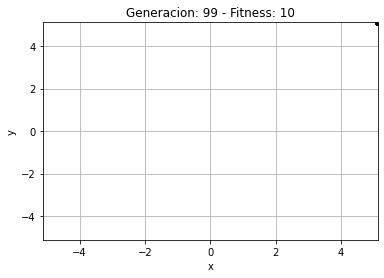

Mejor solución: [5.119953724162868, 5.119113946695872] (Fitness: 10)


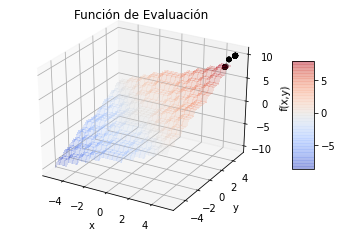

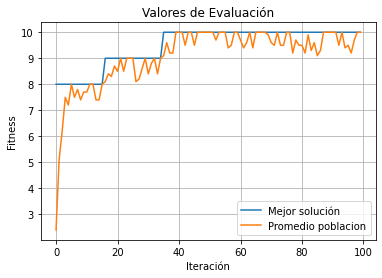

In [ ]:
def funcion_escalon(x_vars):
    return sum([int(xi) for xi in x_vars])

Bounds = [[-5.12, 5.12],[-5.12, 5.12]]
Enteras = [False]*len(Bounds)
f = funcion_escalon
cant_individuos = 10
cant_generac = 100
cant_elite = 1
sel = sel_sus
eps = 0.1
xover = xov_uniform
cant_cruzados = round(0.8 * cant_individuos)
mut = mut_step
cant_mutados = round(0.1 * cant_individuos)

#usar callback = None para que no grafique en cada iteracion y vaya mas rapido
callback = callback_graficar 

Pop = init_pop(cant_individuos, Bounds)
sol, solF, Pop, Fit, traceBest, traceAvg, bestSols = \
    geneticoSimple(Pop, cant_generac, Bounds, Enteras, sel, xover, mut, \
        cant_cruzados, cant_mutados, cant_elite, eps, f, callback)

graficarCaminata(f, bestSols,  Bounds, 0.2, alpha=0.2)

print("Mejor solución: {0} (Fitness: {1})".format(sol, solF))

graficarEvolucionFitness(traceBest, traceAvg)

## Ejercicio 2

Utilizando el código del Algoritmo Genético del punto anterior, búsque el óptimo global de las siguientes funciones:

- G(x, y) = -20 -[x^2+y^2] + 10*[cos(𝜋x)+cos(𝜋y)], x,y ∈ [-5.12, 5.12]
- F2(x,y) = -100(x^2-y)^2 - (1-x)^2, x,y ∈ [-2.048, 2.048]

En cada caso se pide:
1. Ajuste adecuadamente los parámetros del algoritmo de manera de asegurar que encuentre el óptimo global en más del 80% de las ejecuciones. Considere dos cifras decimales de precisión para determinar que llegó al óptimo.
2. Grafique los individuos de la población final en el plano.
3. Generar un gráfico con los valores de fitness de las soluciones encontradas en cada generación y saque conclusiones de su comportamiento al variar los valores de los parámetros.


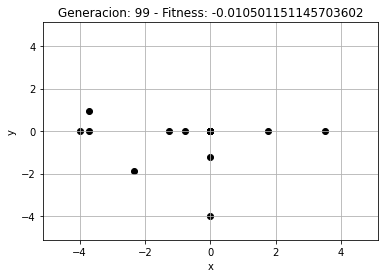

[[-0.23363017534895913, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122039867516, 0.030217705229488523], [-0.010767122

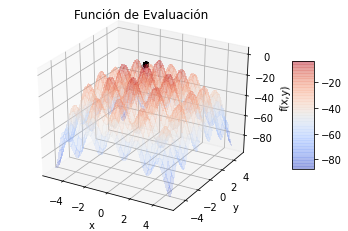

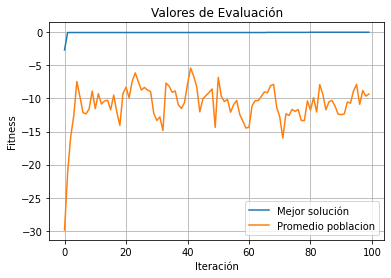

In [ ]:
def rastriguin(X_vars):
    return -20 - sum([xi**2 for xi in X_vars]) + 10*sum([math.cos(3.14*xi) for xi in X_vars])

Bounds = [[-5.12, 5.12],[-5.12, 5.12]]
Enteras = [False]*len(Bounds)
f = rastriguin
cant_individuos = 20
cant_generac =    100
cant_elite =      2
sel =             sel_sus
eps =             0.1
xover =           xov_uniform
cant_cruzados =   round(0.6*cant_individuos)
mut =             mut_step
cant_mutados =    round(0.38*cant_individuos)
callback = callback_graficar #usar None para que no grafique y vaya mas rapido

Pop = init_pop(cant_individuos, Bounds)
sol, solF, Pop, Fit, traceBest, traceAvg, bestSols = \
    geneticoSimple(Pop, cant_generac, Bounds, Enteras, sel, xover, mut, \
        cant_cruzados, cant_mutados, cant_elite, eps, f, callback)

print(bestSols)
graficarCaminata(f, bestSols,  Bounds, 0.1, alpha=0.2)

print("Mejor solución: {0} (Fitness: {1})".format(sol, solF))

graficarEvolucionFitness(traceBest, traceAvg)

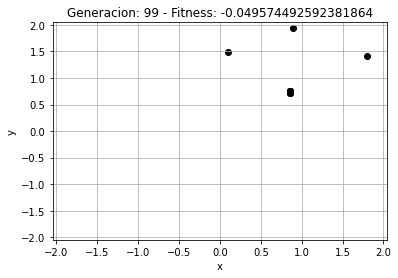

[[-0.332154569034794, 0.17807005565152823], [-0.332154569034794, 0.17807005565152823], [-0.332154569034794, 0.17807005565152823], [-0.332154569034794, 0.17807005565152823], [-0.332154569034794, 0.17807005565152823], [-0.332154569034794, 0.13924733557254454], [-0.332154569034794, 0.13924733557254454], [-0.332154569034794, 0.13924733557254454], [-0.332154569034794, 0.13924733557254454], [-0.332154569034794, 0.13924733557254454], [-0.332154569034794, 0.13924733557254454], [-0.332154569034794, 0.08279226137289764], [-0.332154569034794, 0.08279226137289764], [-0.332154569034794, 0.08279226137289764], [-0.332154569034794, 0.08279226137289764], [-0.332154569034794, 0.08279226137289764], [-0.332154569034794, 0.08279226137289764], [-0.332154569034794, 0.08279226137289764], [0.205055558490586, 0.08279226137289764], [0.205055558490586, 0.08279226137289764], [0.205055558490586, 0.08279226137289764], [0.205055558490586, 0.08279226137289764], [0.205055558490586, 0.08279226137289764], [0.205055558490

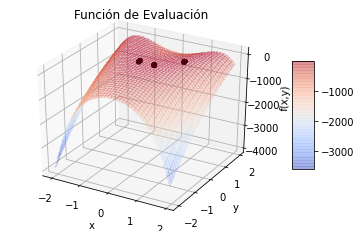

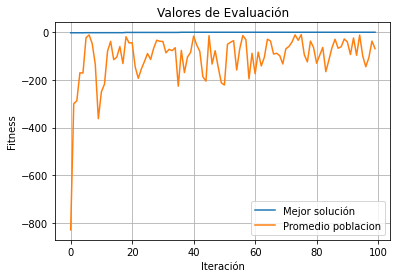

In [ ]:
def F2(X_vars):
  return -100*(X_vars[0]**2 - X_vars[1])**2 - (1-X_vars[0])**2

Bounds = [[-2.048, 2.048],[-2.048, 2.048]]
Enteras = [False]*len(Bounds)
f = F2
cant_individuos =   10
cant_generac =      100
cant_elite =        2
sel =               sel_sus
eps =               0.2
xover =             xov_uniform
cant_cruzados =     round(0.60 * cant_individuos)
mut =               mut_step
cant_mutados =      round(0.38*cant_individuos)
callback = callback_graficar #usar None para que no grafique y vaya mas rapido

Pop = init_pop(cant_individuos, Bounds)
sol, solF, Pop, Fit, traceBest, traceAvg, bestSols = \
    geneticoSimple(Pop, cant_generac, Bounds, Enteras, sel, xover, mut, \
        cant_cruzados, cant_mutados, cant_elite, eps, f, callback)

print(bestSols)
graficarCaminata(f, bestSols,  Bounds, 0.1, alpha=0.2)

print("Mejor solución: {0} (Fitness: {1})".format(sol, solF))

graficarEvolucionFitness(traceBest, traceAvg)

## Ejercicio 3
Dada una cadena binaria de "n" bits, se desea utilizar un AG para encontrar cuál es la solución que agrupe la mayor cantidad de 0s a la izquierda y mayor cantidad de 1s a la derecha. Se pide:
1. Diseñe una función Fitness adecuada para el problema, teniendo en cuenta que las mejores soluciones deben tener un valor más grande que las otras.
2. Utilice el AG del punto anterior para resolver el problema. Para la elección de los operadores, tenga en cuenta que la codificación es binaria.
3. Ajuste los parámetros adecuadamente para resolver el problema tomando n=10, n=20, n=50.
4. En cada caso, grafique la Evolución de los valores de fitness en cada generación.

Gen.0: [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1] (18)
Gen.0: [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] (22)
Gen.1: [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] (22)
Gen.2: [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

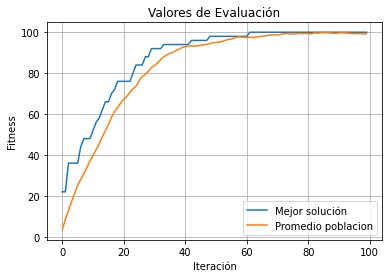

In [ ]:
def fintess_problema_binario(x_vars):
    
    f = 0
    centro = len(x_vars)//2
    for i in range(0,centro):
      if x_vars[i]==0:
        f += 1
      else:
        f -= 1
    
    for i in range(centro,len(x_vars)):
      if x_vars[i]==1:
        f += 1
      else:
        f -= 1

    return f

n = 100 #cantidad de digitos binarios
Bounds = [[0, 1] for i in range(n)]
Enteras = [True]*n
f = fintess_problema_binario
cant_individuos =   50
cant_generac =      100
cant_elite =        2
sel =               sel_sus
eps =               0.1
xover =             xov_uniform
cant_cruzados =     round(0.60*cant_individuos)
mut =               mut_boundary
cant_mutados =      round(0.38*cant_individuos)
callback = callback_print

Pop = init_pop(cant_individuos, Bounds)
sol, solF, Pop, Fit, traceBest, traceAvg, bestSols = \
    geneticoSimple(Pop, cant_generac, Bounds, Enteras, sel, xover, mut, \
        cant_cruzados, cant_mutados, cant_elite, eps, f, callback)

graficarEvolucionFitness(traceBest, traceAvg)